In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import imshow

Matplotlib created a temporary config/cache directory at /var/folders/f2/r7tvqcl54_g_85f8twpz3l8w0000gn/T/matplotlib-lct2hmip because the default path (/Users/chheangly/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def get_frame_coordinate(width,hight,theta):
    lines_frame = {} #creating empty dictionary
    for line in range(1,int(180/theta)):    
        lines_frame['L'+str(line)] = np.empty((0,2),float)#np.array([[0.,0.]])
    angle = np.radians(theta)
    c, s = np.cos(angle), np.sin(angle)
    R = np.array(((c, -s), (s, c))) # the rotating matrix (x -> x')
    #building a i by j matrix 
    for i in range(0,int(hight)):
        for j in range(0,int(width)):
            current = np.array([j-width/2.0,i-hight]) #the translating origin ( x -> -width/2 , y -> -hight)
            rotated = current
            for line in range(1,int(180/theta)):    
                rotated = np.matmul(R,rotated) #rotate (x -> x')
                #check for pixel around that line
                if rotated[1]<0.2 and rotated[1]>-0.2:
                    B = np.array(((c, s), (-s, c))) #the rotating matrix  (x' -> x)
                    for num in range(0,line):
                        rotated = np.matmul(B,rotated) #rotate back (x' -> x)
                    rotated = np.around(rotated+[width/2.0,hight]) #the translating back origin again ( x -> width/2 , y -> hight)
                    #append to dictionary
                    if (lines_frame['L'+str(line)].size==0)or (rotated[0]<width and rotated[1]<hight and rotated[1]!=lines_frame['L'+str(line)][-1][1]):
                        lines_frame['L'+str(line)] = np.append(lines_frame['L'+str(line)],[rotated],axis=0)
    return lines_frame

def plot_some_line(width,hight,line,string):
    plt.axis([0.0,width,0,hight])
    plt.plot(line[:,0],line[:,1],string)
    
def plot_all_line(width,hight,lines,string):
    plt.axis([0.0,width,0,hight])
    for key in lines.keys():
        plt.plot(lines[key][:,0],lines[key][:,1],string)

In [42]:
lines = get_frame_coordinate(30,20,5)

In [38]:
#print(lines)

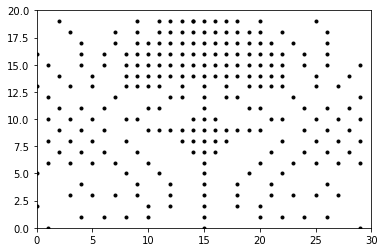

In [43]:
plot_all_line(30,20,lines,'k.')

In [14]:
pil_img = Image.open('road1.jpg').convert('L')
img = np.array(pil_img)
print(img.shape)

(667, 1000)


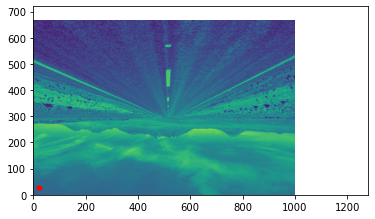

In [20]:
plt.axis([0.0,1280,0.0,720])
imshow(img)
plt.plot(lines['L1'][:,0],lines['L1'][:,1],'r.')

In [23]:
for key in lines.keys():
    count = 0
    temp2 = np.empty((0,3),float)
    for cord in lines[key]:
        #print(lines[key][count])
        temp1 = np.append(lines[key][count], [img[int(cord[1]),int(cord[0])]])
        temp2 = np.append(temp2,[temp1],axis=0)
        count+=1
    lines[key] = temp2
    #print(temp2)


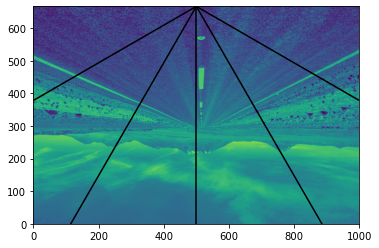

In [24]:
#print(lines)
plot_cord(1000,667,lines,'k')
out = np.array(pil_img)#.rotate(180))
imshow(out)

In [25]:
print(lines)

{'L1': array([[999., 379., 139.],
       [997., 380., 148.],
       [995., 381., 136.],
       [994., 382., 122.],
       [992., 383., 133.],
       [990., 384., 126.],
       [987., 386., 156.],
       [985., 387., 116.],
       [983., 388., 176.],
       [980., 390., 144.],
       [978., 391., 125.],
       [976., 392., 132.],
       [973., 394., 152.],
       [971., 395., 127.],
       [969., 396., 143.],
       [968., 397., 141.],
       [966., 398., 161.],
       [964., 399., 163.],
       [961., 401., 177.],
       [959., 402., 150.],
       [957., 403., 115.],
       [954., 405., 134.],
       [952., 406., 158.],
       [950., 407., 151.],
       [949., 408., 131.],
       [947., 409., 144.],
       [945., 410., 143.],
       [942., 412., 127.],
       [940., 413.,  71.],
       [938., 414., 100.],
       [935., 416., 114.],
       [933., 417.,  83.],
       [931., 418.,  61.],
       [928., 420.,  79.],
       [926., 421., 101.],
       [924., 422., 119.],
       [923., 423.,  